In [1]:
import sys, os, copy, re, random
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as tck
from matplotlib.lines import Line2D
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1)
sns.set_style("whitegrid")
#palette = list(mcolors.TABLEAU_COLORS.keys())
#palette.extend(['salmon', 'teal','yellowgreen'])
sns.set_theme(style="ticks", palette="muted")
sns.set_context("talk")
palette = sns.color_palette(as_cmap=True)

In [7]:
# Read Coulter Counter data:
df_CC = list(pd.read_excel('CC_data.xlsx', sheet_name=None).values())[0]
df_anno = list(pd.read_excel('CC_anno.xlsx', sheet_name=None).values())[0]
df_CC = df_CC.merge(df_anno, left_on='well_ID', right_on='well_ID')
df_CC_mean = df_CC.groupby(['Treatment']).mean().reset_index()
df_CC_stdev = df_CC.groupby(['Treatment']).std().reset_index()
df_CC

,well_ID,mean_cell_size,Prlfr,Treatment
0,p1w10,8353,0.600179,Uri
1,p1w11,7236,0.708695,Ad
2,p1w12,7534,0.647781,Gu
3,p1w13,8443,0.620629,Vec
4,p1w15,8077,0.669170,Asn
...,...,...,...,...
73,p4w4,7763,0.703246,Ad/Gu
74,p4w5,8079,0.738166,Asn/Uri/Ad
75,p4w6,8271,0.722648,Asn/Uri/Ad/Gu
76,p4w7,9638,0.575383,Vec


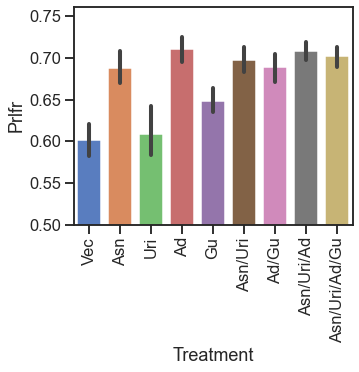

In [15]:
order = ['Vec', 'Asn', 'Uri', 'Ad', 'Gu', 'Asn/Uri', 'Ad/Gu', 'Asn/Uri/Ad', 'Asn/Uri/Ad/Gu']
fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))
g1 = sns.barplot(data=df_CC, x='Treatment', y='Prlfr', order=order)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90);
g1.set_ylim(0.5, g1.get_ylim()[1]);

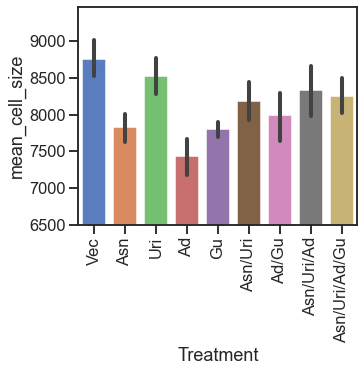

In [18]:
order = ['Vec', 'Asn', 'Uri', 'Ad', 'Gu', 'Asn/Uri', 'Ad/Gu', 'Asn/Uri/Ad', 'Asn/Uri/Ad/Gu']
fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))
g1 = sns.barplot(data=df_CC, x='Treatment', y='mean_cell_size', order=order)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90);
g1.set_ylim(6500, g1.get_ylim()[1]);

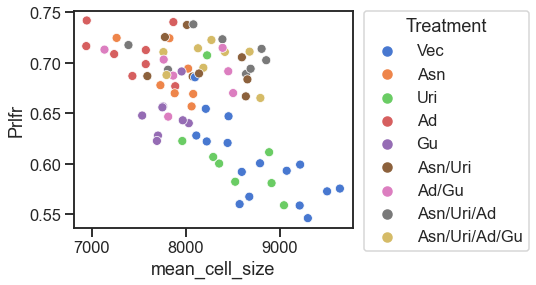

In [24]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))
order = ['Vec', 'Asn', 'Uri', 'Ad', 'Gu', 'Asn/Uri', 'Ad/Gu', 'Asn/Uri/Ad', 'Asn/Uri/Ad/Gu']
g1 = sns.scatterplot(data=df_CC, x='mean_cell_size', y='Prlfr', hue='Treatment', hue_order=order)
g1.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0, title='Treatment');
#g1.set_xticklabels(g1.get_xticklabels(), rotation=90);
#g1.set_ylim(6500, g1.get_ylim()[1]);

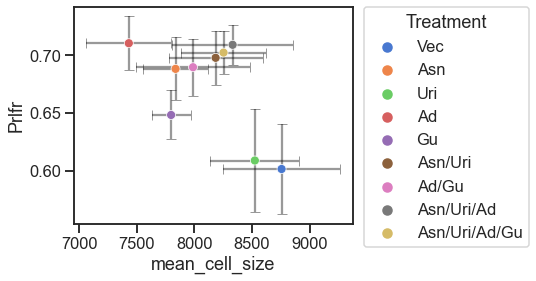

In [27]:
fig, ax1 = plt.subplots(1, 1, figsize=(5, 4))
order = ['Vec', 'Asn', 'Uri', 'Ad', 'Gu', 'Asn/Uri', 'Ad/Gu', 'Asn/Uri/Ad', 'Asn/Uri/Ad/Gu']
g1 = sns.scatterplot(data=df_CC_mean, x='mean_cell_size', y='Prlfr', hue='Treatment', hue_order=order, zorder=20)
g1.errorbar(y=df_CC_mean['Prlfr'].values, x=df_CC_mean['mean_cell_size'].values, yerr=df_CC_stdev['Prlfr'].values, xerr=df_CC_stdev['mean_cell_size'].values, fmt='none', color='black', capsize=5, zorder=10, alpha=0.4)
g1.legend(loc='upper left', bbox_to_anchor=(1.04, 1), borderaxespad=0, title='Treatment');
#g1.set_xticklabels(g1.get_xticklabels(), rotation=90);
#g1.set_ylim(6500, g1.get_ylim()[1]);